In [1]:
# Step 1: Mount Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Step 2: Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [7]:
# Step 3: Load the CSV
file_path = '/content/Review.csv'
df = pd.read_csv(file_path)

In [8]:
# Step 4: View top 5 rows
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


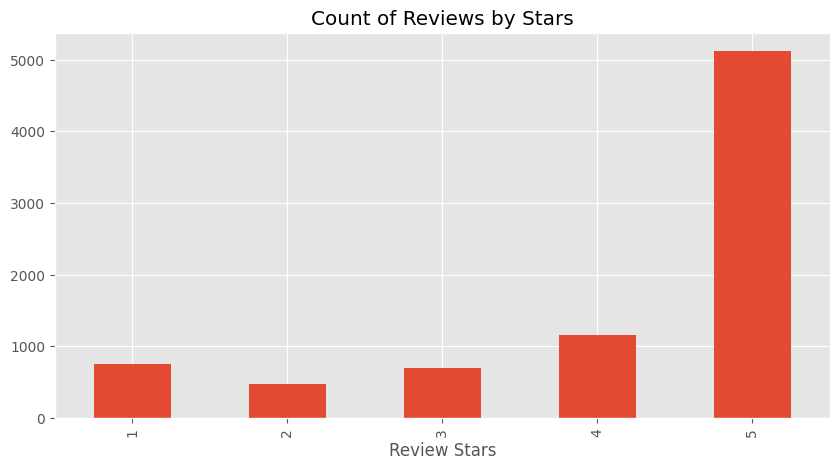

In [9]:
# Step 5: Bar chart of review scores
ax = df['Score'].value_counts().sort_index().plot(
    kind='bar',
    title='Count of Reviews by Stars',
    figsize=(10, 5)
)
ax.set_xlabel('Review Stars')
plt.show()


In [10]:
# Step 6: Download NLTK Resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [11]:
import re
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Define the simplest working preprocessing function
def preprocess_simple(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text)                # remove HTML
    text = re.sub(r'[^a-z\s]', '', text)             # remove punctuation & numbers
    words = text.split()                             # simple split into words
    words = [lemmatizer.lemmatize(word) for word in words if len(word) > 2]  # lemmatize
    return ' '.join(words)


In [12]:
# Run on sample to test
sample_df = df.head(100).copy()
sample_df['cleaned_text'] = sample_df['Text'].apply(preprocess_simple)

# See result
sample_df[['Text', 'cleaned_text']].head()


,Text,cleaned_text
0,I have bought several of the Vitality canned d...,have bought several the vitality canned dog fo...
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...
2,This is a confection that has been around a fe...,this confection that ha been around few centur...
3,If you are looking for the secret ingredient i...,you are looking for the secret ingredient robi...
4,Great taffy at a great price. There was a wid...,great taffy great price there wa wide assortme...


In [13]:
df['cleaned_text'] = df['Text'].apply(preprocess_simple)


In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [15]:
sia = SentimentIntensityAnalyzer()


In [16]:
example = df['Text'][50]
print("Original:", example)
print("Sentiment:", sia.polarity_scores(example))

Original: This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.
Sentiment: {'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}


In [17]:
from tqdm.notebook import tqdm

In [18]:
#Run sentiment on cleaned text (100 sample first)
from tqdm.notebook import tqdm

sample_df = df.head(100).copy()
res = []

for i, row in tqdm(sample_df.iterrows(), total=len(sample_df)):
    text = row['Text']
    score = sia.polarity_scores(text)
    score['Id'] = row['Id']
    res.append(score)

  0%|          | 0/100 [00:00<?, ?it/s]

In [19]:
vader_df = pd.DataFrame(res)
vader_df = vader_df.merge(sample_df, on='Id')
vader_df.head()

,neg,neu,pos,compound,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_text
0,0.000,0.695,0.305,0.9441,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,have bought several the vitality canned dog fo...
1,0.138,0.862,0.000,-0.5664,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...
2,0.091,0.754,0.155,0.8265,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this confection that ha been around few centur...
3,0.000,1.000,0.000,0.0000,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,you are looking for the secret ingredient robi...
4,0.000,0.552,0.448,0.9468,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price there wa wide assortme...


In [20]:
# Create sentiment label
def get_sentiment_label(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

vader_df['sentiment_label'] = vader_df['compound'].apply(get_sentiment_label)
vader_df[['Text', 'compound', 'sentiment_label']].head()


,Text,compound,sentiment_label
0,I have bought several of the Vitality canned d...,0.9441,Positive
1,Product arrived labeled as Jumbo Salted Peanut...,-0.5664,Negative
2,This is a confection that has been around a fe...,0.8265,Positive
3,If you are looking for the secret ingredient i...,0.0000,Neutral
4,Great taffy at a great price. There was a wid...,0.9468,Positive


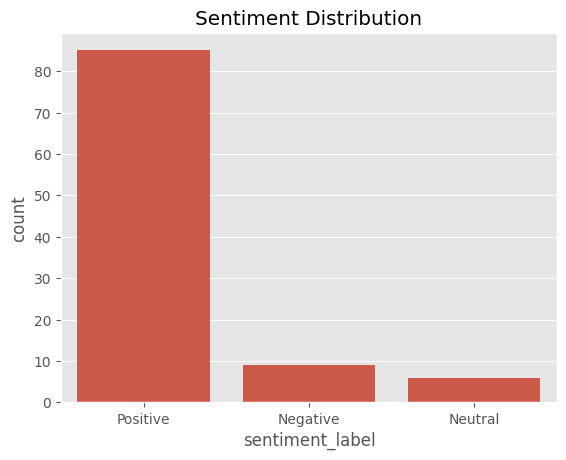

In [21]:
#  Visualize
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=vader_df, x='sentiment_label')
plt.title("Sentiment Distribution")
plt.show()


In [22]:
!pip install -q transformers


In [23]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import torch

MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [24]:
def polarity_scores_roberta(text):
    try:
        encoded_text = tokenizer(text, return_tensors='pt', truncation=True)
        output = model(**encoded_text)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        return {
            'roberta_neg': scores[0],
            'roberta_neu': scores[1],
            'roberta_pos': scores[2]
        }
    except:
        return {'roberta_neg': None, 'roberta_neu': None, 'roberta_pos': None}


In [25]:
from tqdm.notebook import tqdm

sample_df = df.head(100).copy()
roberta_results = []

for text in tqdm(sample_df['Text']):
    roberta_results.append(polarity_scores_roberta(text))

# Join with original sample
roberta_df = pd.DataFrame(roberta_results)
sample_df = pd.concat([sample_df.reset_index(drop=True), roberta_df], axis=1)


  0%|          | 0/100 [00:00<?, ?it/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [26]:
def get_roberta_label(row):
    scores = [row['roberta_neg'], row['roberta_neu'], row['roberta_pos']]
    if None in scores:
        return 'unknown'
    return ['Negative', 'Neutral', 'Positive'][scores.index(max(scores))]

sample_df['roberta_label'] = sample_df.apply(get_roberta_label, axis=1)
sample_df[['Text', 'roberta_label']].head()


,Text,roberta_label
0,I have bought several of the Vitality canned d...,Positive
1,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,This is a confection that has been around a fe...,Positive
3,If you are looking for the secret ingredient i...,Positive
4,Great taffy at a great price. There was a wid...,Positive


In [27]:
sample_df.columns


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'cleaned_text', 'roberta_neg', 'roberta_neu', 'roberta_pos',
       'roberta_label'],
      dtype='object')

In [28]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Create a new DataFrame from existing sample
vader_scores = []

for text in sample_df['Text']:
    score = sia.polarity_scores(text)
    vader_scores.append(score)

vader_df = pd.DataFrame(vader_scores)
sample_df = pd.concat([sample_df.reset_index(drop=True), vader_df], axis=1)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:
def get_vader_label(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

sample_df['sentiment_label'] = sample_df['compound'].apply(get_vader_label)


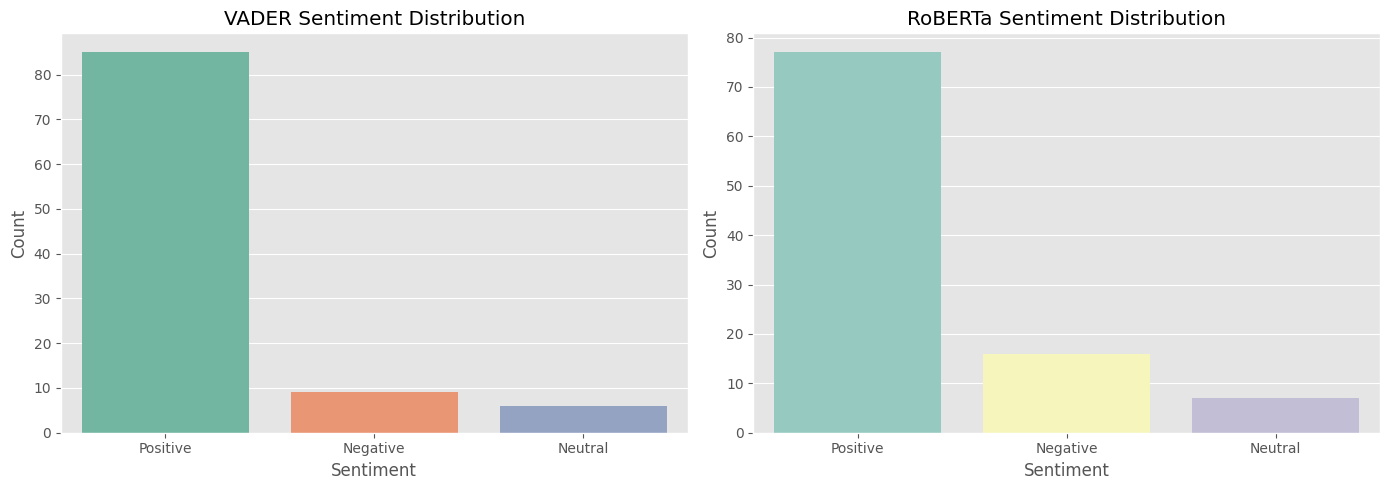

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# VADER Plot
sns.countplot(data=sample_df, x='sentiment_label', hue='sentiment_label', ax=axes[0], palette='Set2', legend=False)
axes[0].set_title('VADER Sentiment Distribution')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Count')

# RoBERTa Plot
sns.countplot(data=sample_df, x='roberta_label', hue='roberta_label', ax=axes[1], palette='Set3', legend=False)
axes[1].set_title('RoBERTa Sentiment Distribution')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()



In [31]:
# Compare sentiment predictions
sample_df['match'] = sample_df['sentiment_label'] == sample_df['roberta_label']

# Count matches
match_count = sample_df['match'].sum()
total = len(sample_df)
match_percent = (match_count / total) * 100

print(f"✅ Matches: {match_count}/{total}")
print(f"🎯 Match Percentage: {match_percent:.2f}%")


✅ Matches: 84/100
🎯 Match Percentage: 84.00%


In [32]:
# Show mismatches (optional)
sample_df[sample_df['match'] == False][['Text', 'sentiment_label', 'roberta_label']].head(5)


,Text,sentiment_label,roberta_label
3,If you are looking for the secret ingredient i...,Neutral,Positive
11,One of my boys needed to lose some weight and ...,Negative,Neutral
12,My cats have been happily eating Felidae Plati...,Positive,Negative
24,"I have lived out of the US for over 7 yrs now,...",Positive,Negative
45,This seems a little more wholesome than some o...,Neutral,Negative


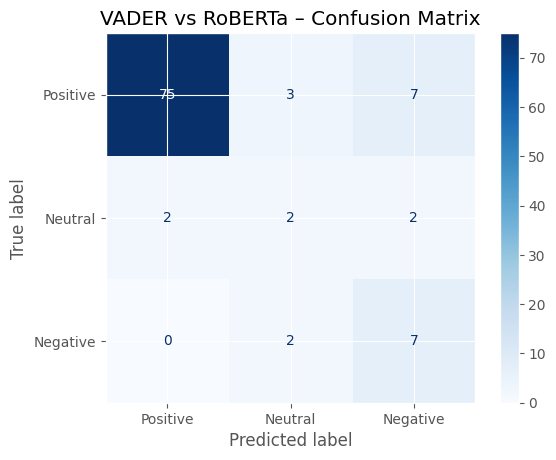

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Drop unknowns (if any)
filtered_df = sample_df[(sample_df['roberta_label'] != 'unknown') & (sample_df['sentiment_label'].notnull())]

# Create labels
y_true = filtered_df['sentiment_label']
y_pred = filtered_df['roberta_label']

# Create and show confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=['Positive', 'Neutral', 'Negative'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Neutral', 'Negative'])
disp.plot(cmap='Blues')
plt.title("VADER vs RoBERTa – Confusion Matrix")
plt.show()


In [34]:
def polarity_scores_roberta(text):
    try:
        encoded_text = tokenizer(text, return_tensors='pt', truncation=True)
        output = model(**encoded_text)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        return {
            'roberta_neg': scores[0],
            'roberta_neu': scores[1],
            'roberta_pos': scores[2]
        }
    except:
        return {'roberta_neg': None, 'roberta_neu': None, 'roberta_pos': None}


In [35]:
# Apply on sample (100 rows)
roberta_results = []
for text in sample_df['Text']:
    roberta_results.append(polarity_scores_roberta(text))

# Join with original sample_df
roberta_df = pd.DataFrame(roberta_results)
sample_df = pd.concat([sample_df.reset_index(drop=True), roberta_df], axis=1)


In [36]:
def get_roberta_label(row):
    try:
        scores = [row['roberta_neg'], row['roberta_neu'], row['roberta_pos']]
        if any(pd.isnull(score) for score in scores):  # check for NaN
            return 'unknown'
        return ['Negative', 'Neutral', 'Positive'][scores.index(max(scores))]
    except:
        return 'unknown'


In [37]:
sample_df['roberta_label'] = sample_df.apply(get_roberta_label, axis=1)
sample_df[['Text', 'sentiment_label', 'roberta_label']].head()


,Text,sentiment_label,roberta_label
0,I have bought several of the Vitality canned d...,Positive,unknown
1,Product arrived labeled as Jumbo Salted Peanut...,Negative,unknown
2,This is a confection that has been around a fe...,Positive,unknown
3,If you are looking for the secret ingredient i...,Neutral,unknown
4,Great taffy at a great price. There was a wid...,Positive,unknown


In [38]:
sample_df[['Text']].isnull().sum()


,0
Text,0


In [39]:
sample_df['Text'].apply(lambda x: len(str(x))).describe()


,Text
count,100.000000
mean,364.250000
std,351.823601
min,57.000000
25%,154.250000
50%,244.500000
75%,419.250000
max,2308.000000


In [40]:
sample_df[['roberta_neg', 'roberta_neu', 'roberta_pos']].head(10)


,roberta_neg,roberta_neg,roberta_neu,roberta_neu,roberta_pos,roberta_pos
0,0.009624,0.009624,0.049980,0.049980,0.940395,0.940395
1,0.508986,0.508986,0.452414,0.452414,0.038600,0.038600
2,0.003229,0.003229,0.098067,0.098067,0.898704,0.898704
3,0.002295,0.002295,0.090219,0.090219,0.907486,0.907486
4,0.001635,0.001635,0.010302,0.010302,0.988063,0.988063
5,0.006130,0.006130,0.021796,0.021796,0.972075,0.972075
6,0.001305,0.001305,0.007774,0.007774,0.990921,0.990921
7,0.002029,0.002029,0.005685,0.005685,0.992285,0.992285
8,0.003874,0.003874,0.094156,0.094156,0.901970,0.901970
9,0.003103,0.003103,0.055912,0.055912,0.940984,0.940984


In [41]:
roberta_results = []
for text in sample_df['Text']:
    roberta_results.append(polarity_scores_roberta(text))

# Combine results
roberta_df = pd.DataFrame(roberta_results)
sample_df = pd.concat([sample_df.reset_index(drop=True), roberta_df], axis=1)

# Reapply the label function
sample_df['roberta_label'] = sample_df.apply(get_roberta_label, axis=1)
